In [6]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
ad_data=pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


<AxesSubplot:>

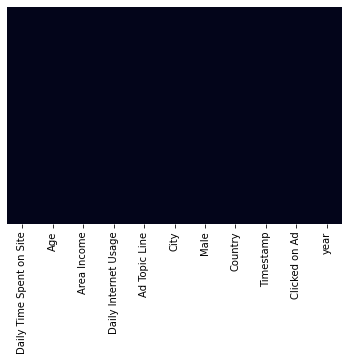

In [34]:
#From the heatplot we made a decision that there is no missing data  
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False)

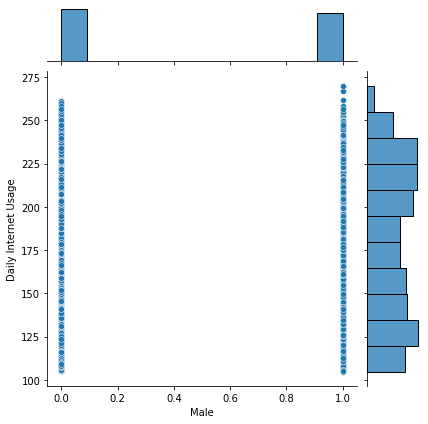

In [11]:
#To check whose data usage is bigger....male users surfed more than female users ...from the jointplot
sns.jointplot(x='Male',y='Daily Internet Usage',data=ad_data)

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

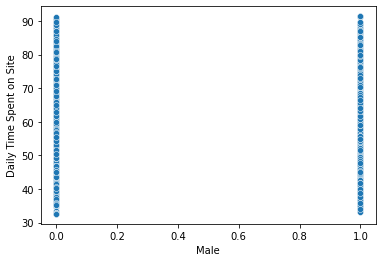

In [12]:
#To check whose daily time spent on site is bigger....male users surfed more than female users ...from the scatterplot
sns.scatterplot(x='Male',y='Daily Time Spent on Site',data=ad_data)

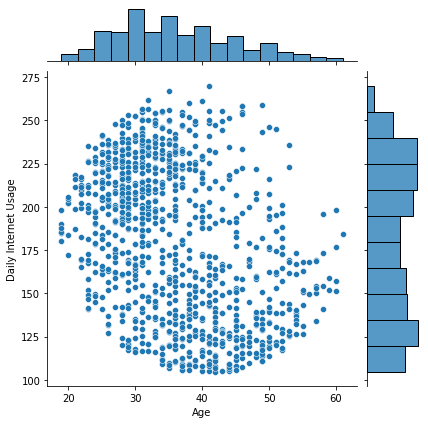

In [13]:
#This plot is Age vs Daily internet usage to check which age people is more used to internet usage
sns.jointplot(x='Age',y='Daily Internet Usage',data=ad_data)

In [14]:
#Build a model to predict the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
lor=LogisticRegression()

In [18]:
lor.fit(X_train,y_train)

LogisticRegression()

In [19]:
predict=lor.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [22]:
new_data=[[71,1,68441.85,56,0]]

In [23]:
lor.predict(new_data)

array([0], dtype=int64)

In [24]:
x='2016-03-27 00:53:11'
x.split('-')[0]

'2016'

In [31]:
ad_data['year']=ad_data['Timestamp'].apply(lambda x: int(x.split('-')[0]))

In [32]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,year
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016
